In [1]:
import numpy as np
import pandas as pd
from keras.utils import np_utils
np.random.seed(10)



Using TensorFlow backend.


In [2]:
from keras.datasets import mnist

In [3]:
(X_train_image , y_train_label), \
(X_test_image,y_test_label) = mnist.load_data()

In [4]:
print('train data=',len(X_train_image))
print('test_image=',len(X_test_image))

train data= 60000
test_image= 10000


In [5]:
print('X_train_image',X_train_image.shape)
print('X_test_image',y_train_label.shape)

X_train_image (60000, 28, 28)
X_test_image (60000,)


In [6]:
import matplotlib.pyplot as plt
def plot_image(image):
    fig=plt.gcf()
    fig.set_size_inches(2,2)
    plt.imshow(image,cmap='binary')
    plt.show()

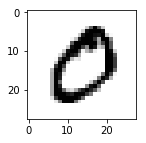

0


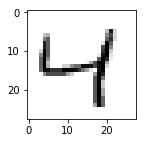

4


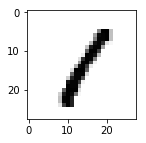

1


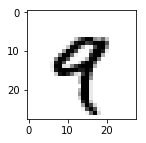

9


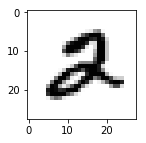

2


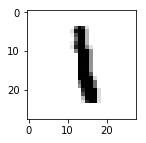

1


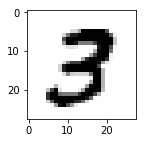

3


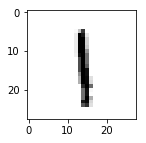

1


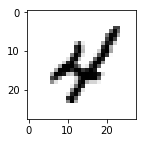

4


In [7]:
for i in range(1,10):
    plot_image(X_train_image[i])
    print(y_train_label[i])

In [8]:
import matplotlib.pyplot as plt
def plot_images_labels_predication(images,labels,predication,idx,num=10):
    fig = plt.gcf()
    fig.set_size_inches(12,14)
    if num>25:num=25
    for i in range(1,num):
        ax=plt.subplot(5,5,i+1)
        ax.imshow(images[idx],cmap='binary')
        title = "label="+str(labels[idx])
        if len(predication)>0:   #如果有傳入預測結果
            title+=',predict='+str(predication[idx])#標題title加入預測結果
        ax.set_title(title,fontsize=10)#設定子圖形的標題title and 大小
        ax.set_xticks([]);ax.set_yticks([])#設定不顯示刻度
        idx+=1
        plt.show()

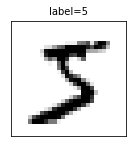

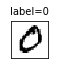

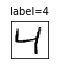

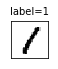

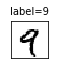

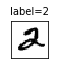

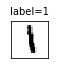

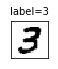

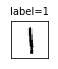

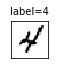

In [46]:
plot_images_labels_predication(X_train_image,y_train_label,[],0,11)

In [20]:
help(plt.imshow)

Help on function imshow in module matplotlib.pyplot:

imshow(X, cmap=None, norm=None, aspect=None, interpolation=None, alpha=None, vmin=None, vmax=None, origin=None, extent=None, shape=None, filternorm=1, filterrad=4.0, imlim=None, resample=None, url=None, hold=None, data=None, **kwargs)
    Display an image on the axes.
    
    Parameters
    ----------
    X : array_like, shape (n, m) or (n, m, 3) or (n, m, 4)
        Display the image in `X` to current axes.  `X` may be an
        array or a PIL image. If `X` is an array, it
        can have the following shapes and types:
    
        - MxN -- values to be mapped (float or int)
        - MxNx3 -- RGB (float or uint8)
        - MxNx4 -- RGBA (float or uint8)
    
        The value for each component of MxNx3 and MxNx4 float arrays
        should be in the range 0.0 to 1.0. MxN arrays are mapped
        to colors based on the `norm` (mapping scalar to scalar)
        and the `cmap` (mapping the normed scalar to a color).
    
    cm

In [10]:
print('x_train_image:',X_train_image.shape)
print('y_trian_label:',y_train_label.shape)

x_train_image: (60000, 28, 28)
y_trian_label: (60000,)


In [13]:
x_Train=X_train_image.reshape(60000,784).astype('float32')
x_Test=X_test_image.reshape(10000,784).astype('float32')
print('x_Train:',x_Train.shape)
print('x_Test',x_Test.shape)

x_Train: (60000, 784)
x_Test (10000, 784)


In [15]:
X_train_image[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [16]:
x_Train_normalize=x_Train/255
x_Test_normalize=x_Test/255

In [20]:
x_Train
x_Train_normalize[0]

array([ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.  

In [21]:
y_train_label[:5]

array([5, 0, 4, 1, 9], dtype=uint8)

In [22]:
help(np_utils.to_categorical)

Help on function to_categorical in module keras.utils.np_utils:

to_categorical(y, num_classes=None)
    Converts a class vector (integers) to binary class matrix.
    
    E.g. for use with categorical_crossentropy.
    
    # Arguments
        y: class vector to be converted into a matrix
            (integers from 0 to num_classes).
        num_classes: total number of classes.
    
    # Returns
        A binary matrix representation of the input.



In [ ]:
y_TrainOneHot=np_utils.to_categorical(y_train_label)
y_TestOneHot=np_utils.to_c